In [1]:
#!pip install -U scikit-learn
#!pip show scikit-learn

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/diegonogare/MachineLearning/main/alimentos.csv", sep=';')
#dados = pd.read_csv("https://raw.githubusercontent.com/diegonogare/MachineLearning/main/alimentos2.csv", sep=';')

In [3]:
dados.describe()

,Lipídeos,Ferro
count,28.000000,28.000000
mean,8.114286,1.417857
std,9.945992,1.514389
min,0.000000,0.000000
25%,0.650000,0.275000
50%,3.350000,0.700000
75%,13.700000,2.400000
max,33.500000,5.700000


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Descrição dos alimentos  28 non-null     object 
 1   Lipídeos                 28 non-null     float64
 2   Ferro                    28 non-null     float64
dtypes: float64(2), object(1)
memory usage: 800.0+ bytes


In [5]:
dados.head()

,Descrição dos alimentos,Lipídeos,Ferro
0,Queijo. minas. frescal,20.2,0.9
1,Queijo. minas. meia cura,24.6,0.2
2,Queijo. mozarela,25.2,0.3
3,Queijo. parmesão,33.5,0.5
4,Queijo. pasteurizado,27.4,0.3


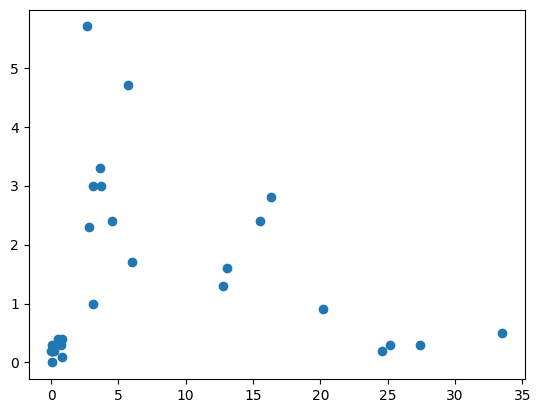

In [6]:
plt.scatter(dados['Lipídeos'],dados['Ferro'])

In [7]:
cluster = KMeans(n_clusters=4).fit(dados[['Lipídeos','Ferro']])
#cluster = KMeans(n_clusters=5).fit(dados[['Lipídeos','Ferro']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
print(cluster)
print(cluster.labels_)
print(cluster.cluster_centers_)

KMeans(n_clusters=4)
[2 0 0 0 0 2 2 2 2 1 1 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1]
[[27.675       0.325     ]
 [ 3.91111111  3.01111111]
 [15.58        1.8       ]
 [ 0.34        0.23      ]]


In [9]:
dados2=dados
dados2['clusters'] = cluster.labels_

print(dados2)

                              Descrição dos alimentos  Lipídeos  Ferro  \
0                              Queijo. minas. frescal      20.2    0.9   
1                            Queijo. minas. meia cura      24.6    0.2   
2                                    Queijo. mozarela      25.2    0.3   
3                                    Queijo. parmesão      33.5    0.5   
4                                Queijo. pasteurizado      27.4    0.3   
5          Carne. bovina. contra-filé de costela. cru      13.1    1.6   
6     Carne. bovina. contra-filé de costela. grelhado      16.3    2.8   
7        Carne. bovina. contra-filé. com gordura. cru      12.8    1.3   
8   Carne. bovina. contra-filé. com gordura. grelhado      15.5    2.4   
9        Carne. bovina. contra-filé. sem gordura. cru       6.0    1.7   
10  Carne. bovina. contra-filé. sem gordura. grelhado       4.5    2.4   
11                          Abóbora. cabotian. cozida       0.7    0.3   
12                            Abóbora.

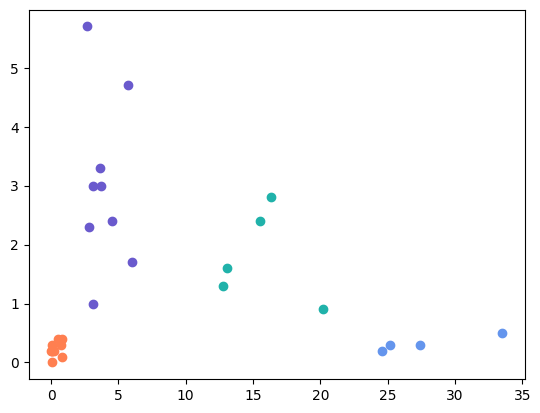

In [10]:
cores = {0:'cornflowerblue',1:'slateblue',2:'lightseagreen',3:'coral',4:'hotpink'}

for grupo in dados2['clusters'].unique():
    tmp = dados2[dados2['clusters'] == grupo]
    plt.scatter(tmp['Lipídeos'], tmp['Ferro'], color=cores[grupo] )


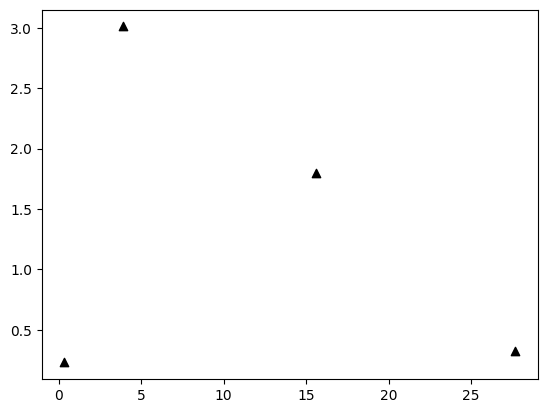

In [11]:
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], color='black', marker='^')


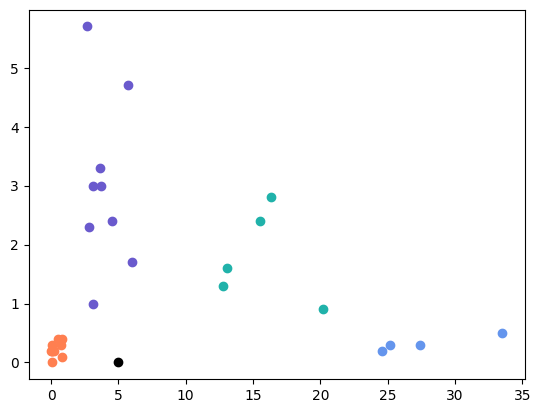

In [12]:
Novo_Dado_Lipideo = [5]
Novo_Dado_Ferro = [0]
Novo_Dado = {'Lipideo':Novo_Dado_Lipideo, 'Ferro':Novo_Dado_Ferro }
df = pd.DataFrame(Novo_Dado)

for grupo in dados2['clusters'].unique():
    tmp = dados2[dados2['clusters'] == grupo]
    plt.scatter(tmp['Lipídeos'], tmp['Ferro'], color=cores[grupo] )

plt.scatter(df['Lipideo'], df['Ferro'], c='black')

In [13]:
novo_valor = cluster.predict( [ df.iloc[0] ])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [14]:
valor_Transform = cluster.transform([ df.iloc[0][0:2] ])
print(valor_Transform)

[[22.67732899  3.20194771 10.73202684  4.66567251]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [15]:
print(novo_valor)

[1]


In [16]:
df['clusters'] = novo_valor

print(df)

   Lipideo  Ferro  clusters
0        5      0         1


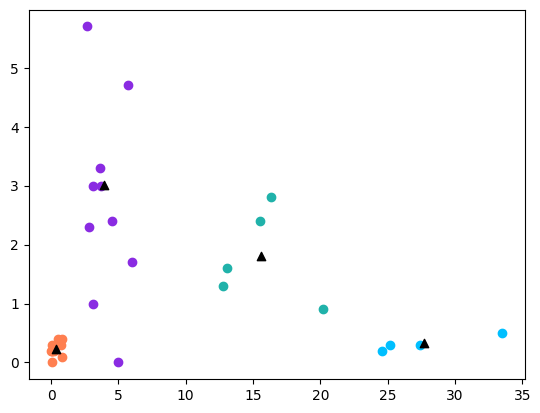

In [17]:
cores = {0:'deepskyblue',1:'blueviolet',2:'lightseagreen',3:'coral',4:'hotpink'}
for grupo in dados2['clusters'].unique():
    tmp = dados2[dados2['clusters'] == grupo]
    plt.scatter(tmp['Lipídeos'], tmp['Ferro'], color=cores[grupo] )

plt.scatter(df['Lipideo'], df['Ferro'], color=cores[df.iloc[0]['clusters']])

plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], color='black', marker='^')

